<a href="https://colab.research.google.com/github/hyeonji826/Tensorflow/blob/main/Course1_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
# 패션 MNIST 데이터셋 불러오기
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images, tes_labels) =mnist.load_data()
# training_images,training_labels - 학습용 데이터
# test_images, tes_labels - 새로운 데이터 평가용

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 1. 데이터 확인 및 전처리

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

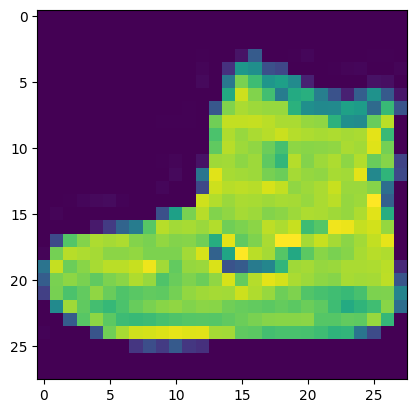

In [3]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

plt.imshow(training_images[0])
print(training_labels[0])
print(training_images[0])

# 이미지의 픽셀 값은 0~255 사이이다.
# 신경망 학습 시에는 이를 0과 1 사이로 정규화(normalizing)하는 것이 좋다
training_images = training_images /255.0
test_images =test_images /255.0

## 3. 모델 설계
### 모델 아키텍처 구성
패션 MNIST는 28x28 크기의 흑백이미지
1. **Flatten 레이어**로 28x28 이미지를 1차원 배열(784개 값)로 변환한다.
2. **Dense 레이어**를 사용해 은닉층을 구성하고,
3. 마지막 **Dense 레이어**에서 10개의 뉴런(각각 0~9에 해당하는 클래스)을 통해 소프트맥스(softmax) 함수를 적용해 확률값을 출력한다.

- **Flatten** : 2차원 배열(이미지)을 1차원으로 변환하여 Dense 레이어에 입력할 수 있게 한다.
- **Dense(128, activation=tf.nn.relu)** : 128개의 뉴런과 ReLU 활성화 함수를 사용해 입력 데이터를 처리한다.
- **Dense(10,activation=tf.nn.softmax)** : 10개의 뉴런을 통해 각 클래스에 대한 확률을 출력한다.

```r
model = tf.keras.model.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
```

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

## 3. 모델 컴파일과 학습
모델을 컴파일할 때는 옵티마이저와 손실 함수를 지정한다.

In [6]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델을 학습하기 위해 model.fit 함수를 호춯하며, 에포크(epoch)를 지정한다.
model.fit(training_images,training_labels,epochs=5)

# 결과
# 약 91%

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7786 - loss: 0.6342
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8588 - loss: 0.3880
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8758 - loss: 0.3418
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8852 - loss: 0.3134
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8917 - loss: 0.2937


## 4. 모델 평가 및 예측
학습된 모델이 보지 않은 테스트 데이터에 대해 얼마나 잘 동작하는지 평가할 수 있다.

```r
model.evaluate(test_images,test_labels)
```

## Exploration Exercises

# Exercise 1
아래 코드를 실행해보시오.
```r
classifications = model.predict(test_images)

print(classifications[0])
```
이 코드는 테스트 이미지 각각에 대해 분류 결과 집합을 생성한 후, 그 분류 결과의 첫번째 항목을 출력한다. 코드를 실행한 후의 출력 결과는 숫자들의 리스트이다. 왜 이렇게 된다고 생각하며, 이 숫자들은 무엇을 나타내는가?

In [11]:
classifications = model.predict(test_images)

print(classifications[0])
# print(test_labels[0])   # 9

# 위의 리스트는 무엇을 나타내는가?
# Ans) 이 항목이 10개의 클래스 각각에 속할 확률을 나타낸다.
# 이 숫자들은 분류되는 값이 해당 클래스에 속할 확률을 나타낸다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[2.2397442e-06 1.9619616e-08 2.5875527e-08 5.2573936e-09 3.4875296e-08 9.8497542e-03 1.2382285e-06 5.0208580e-02 1.2023231e-05 9.3992621e-01]


## Exercise 2
512 뉴런을 가진 Dense 레이어의 값을 다른 값으로 실험해보자.
손실값, 학습시간 등에서 어떤 결과의 차이가 나타나는지 확인하고, 왜 그런 결과가 나오는지 생각해보자

In [12]:
import tensorflow as tf
print(tf.__version__)

mnist =tf.keras.datasets.mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

# Question 1. Increase to 1024 Neurons -- What's the impact?
# 학습은 더 오래 걸리지만 정확도는 상승할 것이다.

2.18.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 0.3099
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 0.0730
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0456
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - loss: 0.0291
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 0.0238
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0902
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
[1.4813381e-10 4.5302389e-09 1.6995211e-08 1.0227684e-06 1.6739574e-12 2.1144768e-10 9.3231568e-14 9.9999887e-01 4.3258810e-11 2.0311061e-08]
7


## Exercise 3
- 만약 Flatten() 레이어를 제거하면 어떻게 되는가?
- 결과가 나온다면 왜 그런 결과가 나오는가?

In [14]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images,training_labels),(test_images,test_labels)=mnist.load_data()

training_images = training_images/255.0
test_images = test_images /255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images,training_labels,epochs=5)
model.evaluate(test_images,test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

# 데이터의 형태에 관한 오류가 발생한다.
# 현재 데이터는 28x28 이미지이며, 28개의 레이어에 28개의 뉴런을 사용하는 것은
# 실행 불가능하므로, 28x28을 784x1로 '평탄화(Flatten)'하는 것이 합리적

2.18.0
Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(32,), output.shape=(32, 28, 10)

## Exercise 4
- 최종(출력)레이어를 고려해보자.
- 왜 레이어가 10개일까?
-만약 10개가 아닌 다른 개수를 사용한다면 어떤 일이 발생할까?

-- 5개로 네트워크를 학습시키자.

In [1]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

# 결과
# 예기치 않은 값이 발견되며 바로 오류가 발생할 것이다.
# 또 다른 경험 법칙은 마지막 레이어의 뉴런 수는 분류하려는 클래스의 수와 일치해야 한다.
# 이 경우 0~9까지의 숫자, 즉 총 10개의 클래스가 있으므로
# 최종 레이어에는 10개의 뉴런이 있어야 한다.


2.18.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-1-04e5ea87fa1d>", line 18, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 113, in one_step_on_data

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 60, in train_step

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 383, in _compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/trainer.py", line 351, in compute_loss

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 691, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/trainers/compile_utils.py", line 700, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/loss.py", line 67, in __call__

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 33, in call

  File "/usr/local/lib/python3.11/dist-packages/keras/src/losses/losses.py", line 2246, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py", line 1963, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py", line 744, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 0 9 9 0 6 4 9 8 5 3 9 2 2 4 0 1 4 4 8 1 5 1 2 2 2 7 7 0 8 4 7 0
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_multi_step_on_iterator_937]

## Exercise 5
- 512 뉴런을 가진 레이어와 최종 레이어(10개의 뉴런) 사이에 또 다른 레이어를 추가한 경우, 예상결과를 생각해보자.

In [2]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

# 결과
# 이 데이터는 비교적 단순하기 때문에 큰 영향은 없다.
# 하지만 훨씬 복잡한 데이터에서는 추가 레이어가 필요하다.

2.18.0
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - loss: 0.3156
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - loss: 0.0804
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - loss: 0.0487
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.0372
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 0.0312
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0974
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[1.1493573e-09 1.5818787e-07 9.3101806e-07 4.6047987e-08 5.0209810e-09
 1.0625439e-09 2.2346953e-12 9.9999768e-01 1.4749345e-07 1.0361890e-06]
7


## Exercise 6
- 훈련 에포크 수가 많거나 적은 것의 영향을 예상해보자.
- 15 에포크로 시도하면, 5 에포크로 학습한 모델보다 훨씬 낮은 손실 값을 가진 모델을 얻을 가능성이 크다.
- 30 에포크로 시도하면 손실 값이 더 이상 감소하지 않고 때때로 증가하는 것을 볼 수 있다.
- 이는 **과적합(overfitting)**이라고 불리는 현상의 부작용이다.

In [ ]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

## Exercise 7
- 본 코드는 0-255범위에서 0-1범위로 정규화 했다.
- 만약, 이 과정을 제거하면 어떻게 변화할까?


In [3]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

2.18.0
Epoch 1/5
1734/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3438

KeyboardInterrupt: 

## Exercise 8
- 콜백(callbacks)을 학습해보자.

In [5]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nReached 60% accuracy so cancelling training")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels),(test_images,test_labels) = mnist.load_data()
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

2.18.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 15.9174
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - loss: 0.5515
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 0.4993
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - loss: 0.4909
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - loss: 0.4728
